In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from scipy.optimize import curve_fit
import math


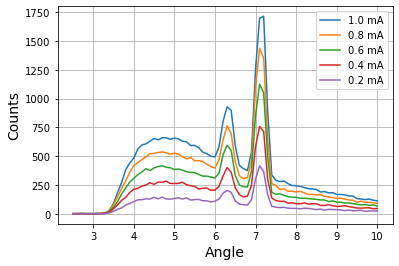

In [2]:
source = 'Physics 307 Lab 6.csv'

file = open(source)
#print(file)

csvreader = csv.reader(file)
#print(csvreader)

data = pd.read_csv(source)

one_sec_float = [float(x) for x in data['1 second']]
ten_sec_float = [float(x) for x in data['10 seconds']]
v_30_float = [float(x) for x in data['30 V']]
v_25_float = [float(x) for x in data['25 V']]
v_22_5_float = [float(x) for x in data['22.5 V']]
v_20_float = [float(x) for x in data['20 V']]
v_15_float = [float(x) for x in data['15 V']]
mA_8_float = [float(x) for x in data['0.8 mA']]
mA_6_float = [float(x) for x in data['0.6 mA']]
mA_4_float = [float(x) for x in data['0.4 mA']]
mA_2_float = [float(x) for x in data['0.2 mA']]

angle_float = [float(x) for x in data['Angle']]

plt.figure()

#plt.plot(angle_float, one_sec_float, label = 'One Second')
plt.plot(angle_float, ten_sec_float, label = '1.0 mA')
#plt.plot(angle_float, v_30_float, label = '30 V')
#plt.plot(angle_float, v_25_float, label = '25 V')
#plt.plot(angle_float, v_22_5_float, label = '22.5 V')
#plt.plot(angle_float, v_20_float, label = '20 V')
#plt.plot(angle_float, v_15_float, label = '15 V')
plt.plot(angle_float, mA_8_float, label = '0.8 mA')
plt.plot(angle_float, mA_6_float, label = '0.6 mA')
plt.plot(angle_float, mA_4_float, label = '0.4 mA')
plt.plot(angle_float, mA_2_float, label = '0.2 mA')
plt.grid()

plt.xlabel('Angle', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
#plt.xlim(2, 10)

plt.legend()

#plt.savefig('counts_angle_current.png', bbox_inches='tight')

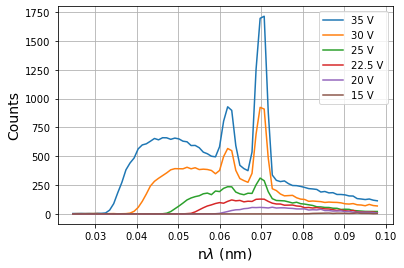

In [3]:
n_lambda = [0.5640*math.sin(x*math.pi/180) for x in angle_float]

plt.figure()

#plt.plot(n_lambda, one_sec_float, label = 'One Second')
plt.plot(n_lambda, ten_sec_float, label = '35 V')
plt.plot(n_lambda, v_30_float, label = '30 V')
plt.plot(n_lambda, v_25_float, label = '25 V')
plt.plot(n_lambda, v_22_5_float, label = '22.5 V')
plt.plot(n_lambda, v_20_float, label = '20 V')
plt.plot(n_lambda, v_15_float, label = '15 V')
#plt.plot(n_lambda, mA_8_float, label = '0.8 mA')
#plt.plot(n_lambda, mA_6_float, label = '0.6 mA')
#plt.plot(n_lambda, mA_4_float, label = '0.4 mA')
#plt.plot(n_lambda, mA_2_float, label = '0.2 mA')
plt.grid()

plt.xlabel('n$\lambda$ (nm)', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
#plt.xlim(0.02, 0.1)

plt.legend()

#plt.savefig('counts_nlambda_voltage.png', bbox_inches='tight')

In [4]:
energy = [1.986*10**(-25)/(x*10**(-9)) for x in n_lambda]

#plt.figure()

#plt.plot(energy, one_sec_float, label = 'One Second')
#plt.plot(energy, ten_sec_float, label = '35 V')
#plt.plot(energy, v_30_float, label = '30 V')
#plt.plot(energy, v_25_float, label = '25 V')
#plt.plot(energy, v_22_5_float, label = '22.5 V')
#plt.plot(energy, v_20_float, label = '20 V')
#plt.plot(energy, v_15_float, label = '15 V')
#plt.plot(energy, mA_8_float, label = '0.8 mA')
#plt.plot(energy, mA_6_float, label = '0.6 mA')
#plt.plot(energy, mA_4_float, label = '0.4 mA')
#plt.plot(energy, mA_2_float, label = '0.2 mA')
#plt.grid()

#plt.legend()

#plt.xlabel('Energy/n (J)', fontsize = 14)
#plt.ylabel('Counts', fontsize = 14)

[-5.79830350e-16  1.89498685e-16]
[8.0773375e-17 3.1758359e-18]


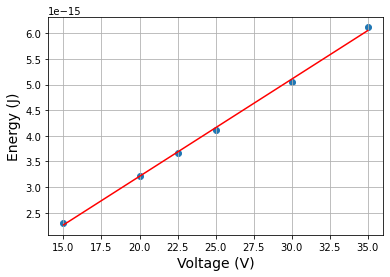

In [5]:
plt.figure()

energies = [energy[8], energy[15], energy[24], energy[30], energy[38], energy[63]]
voltages = [35, 30, 25, 22.5, 20, 15]

def fitting_function(x, a0, a1):
    return a0 + a1*x
    #return a0 + np.exp(a1*x)
popt2, pcov2 = curve_fit(fitting_function, voltages, energies, p0 = [0, 2e-16])
print(popt2)
perr2 = np.sqrt(np.diag(pcov2))
print(perr2)


x = np.arange(15, 36, 1)
#print(fitting_function(x, *popt2))
plt.plot(x, fitting_function(x, *popt2), label = 'Curve Fit', color = 'r')

plt.scatter(voltages, energies)

plt.xlabel('Voltage (V)', fontsize = 14)
plt.ylabel('Energy (J)', fontsize = 14)

plt.grid()

#plt.savefig('energy_limit.png', bbox_inches='tight')

[1714.8, 1435.8, 1125.6, 758.8, 416.6]
[2124.705 -419.325]
[44.91490444 67.71176553]
9.288668757960017e-05


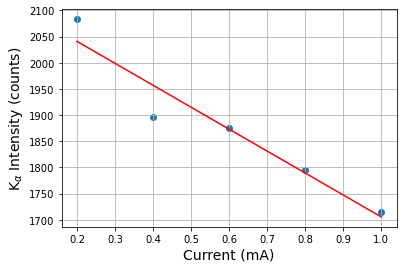

In [6]:
plt.figure()

currents = [1.00, 0.80, 0.60, 0.40, 0.20]
intensities = [ten_sec_float[47], mA_8_float[46], mA_6_float[46], mA_4_float[46], mA_2_float[46]]
scaling = [ten_sec_float[47]/1.00, mA_8_float[46]/0.80, mA_6_float[46]/0.60, mA_4_float[46]/0.40, mA_2_float[46]/0.20]

print(intensities)

def fitting_function(x, a0, a1):
    return a0 + a1*x
    #return a0 + np.exp(a1*x)
popt2, pcov2 = curve_fit(fitting_function, currents, scaling, p0 = [2200, -200])
print(popt2)
perr2 = np.sqrt(np.diag(pcov2))
print(perr2)

dead_time = -popt2[1]/popt2[0]**2
print(dead_time)

x = np.arange(0.2, 1.1, 0.1)
#print(fitting_function(x, *popt2))
plt.plot(x, fitting_function(x, *popt2), label = 'Curve Fit', color = 'r')

plt.scatter(currents, scaling)

plt.xlabel('Current (mA)', fontsize = 14)
plt.ylabel(r'K$_\alpha$ Intensity (counts)', fontsize = 14)

plt.grid()

plt.savefig('scaling.png', bbox_inches='tight')

In [7]:
c_one_sec_float = [x/(1-x*dead_time) for x in one_sec_float]
c_ten_sec_float = [x/(1-x*dead_time) for x in ten_sec_float]
c_v_30_float = [x/(1-x*dead_time) for x in v_30_float]
c_v_25_float = [x/(1-x*dead_time) for x in v_25_float]
c_v_22_5_float = [x/(1-x*dead_time) for x in v_22_5_float]
c_v_20_float = [x/(1-x*dead_time) for x in v_20_float]
c_v_15_float = [x/(1-x*dead_time) for x in v_15_float]
c_mA_8_float = [x/(1-x*dead_time) for x in mA_8_float]
c_mA_6_float = [x/(1-x*dead_time) for x in mA_6_float]
c_mA_4_float = [x/(1-x*dead_time) for x in mA_4_float]
c_mA_2_float = [x/(1-x*dead_time) for x in mA_2_float]

difference = np.divide(np.subtract(c_one_sec_float, one_sec_float), c_one_sec_float) *100
#print(difference)
print(np.min(difference), np.max(difference))

0.00928866875795071 17.453408596206874


Text(0, 0.5, 'Counts')

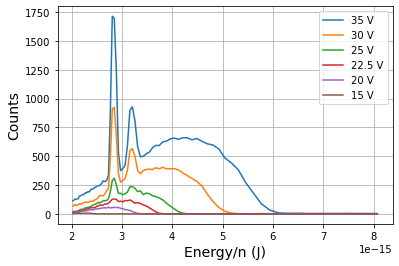

In [8]:
plt.figure()

#plt.plot(energy, one_sec_float, label = 'One Second')
plt.plot(energy, ten_sec_float, label = '35 V')
plt.plot(energy, v_30_float, label = '30 V')
plt.plot(energy, v_25_float, label = '25 V')
plt.plot(energy, v_22_5_float, label = '22.5 V')
plt.plot(energy, v_20_float, label = '20 V')
plt.plot(energy, v_15_float, label = '15 V')
#plt.plot(energy, mA_8_float, label = '0.8 mA')
#plt.plot(energy, mA_6_float, label = '0.6 mA')
#plt.plot(energy, mA_4_float, label = '0.4 mA')
#plt.plot(energy, mA_2_float, label = '0.2 mA')
plt.grid()

plt.legend()

plt.xlabel('Energy/n (J)', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

#plt.savefig('corrected_current.png', bbox_inches='tight')

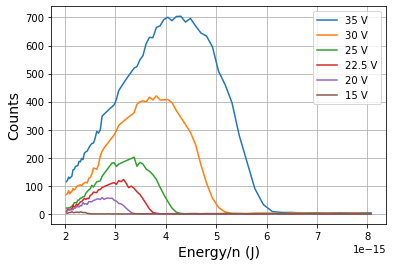

In [19]:
source2 = 'Lab 6 Background.csv'

file2 = open(source2)
#print(file)

csvreader2 = csv.reader(file2)
#print(csvreader)

data2 = pd.read_csv(source2)

v_35 = [float(x) for x in data2['35V']]
v_30 = [float(x) for x in data2['30V']]
v_25 = [float(x) for x in data2['25 V']]
v_22_5 = [float(x) for x in data2['22.5V']]
v_20 = [float(x) for x in data2['20V']]
v_15 = [float(x) for x in data2['15V']]

c_v_35 = [x/(1-x*dead_time) for x in v_35]
c_v_30 = [x/(1-x*dead_time) for x in v_30]
c_v_25 = [x/(1-x*dead_time) for x in v_25]
c_v_22_5 = [x/(1-x*dead_time) for x in v_22_5]
c_v_20 = [x/(1-x*dead_time) for x in v_20]
c_v_15 = [x/(1-x*dead_time) for x in v_15]

plt.plot(energy[0:76], c_v_35, label = '35 V')
plt.plot(energy[0:76], c_v_30, label = '30 V')
plt.plot(energy[0:76], c_v_25, label = '25 V')
plt.plot(energy[0:76], c_v_22_5, label = '22.5 V')
plt.plot(energy[0:76], c_v_20, label = '20 V')
plt.plot(energy[0:76], c_v_15, label = '15 V')

plt.grid()

plt.legend()

plt.xlabel('Energy/n (J)', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

plt.savefig('spectral_background.png', bbox_inches='tight')

<ipython-input-31-b50fe4b76c04>:15: RuntimeWarning: invalid value encountered in power
  return A*(x - Vt)**a


[29.65964482 21.85612631  1.48707941]
[10.80743397  0.56155042  0.11995022]
-0.02484513151945433


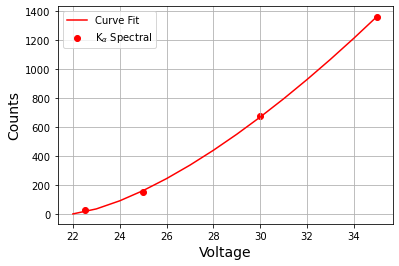

In [31]:
volt_a = [35, 30, 25, 22.5]
volt_b = [35, 30, 25]
alpha_s = [1364.9, 678.0, 150.9, 26.4]
beta_s = [470.6, 239.9, 52.8]
alpha_b = [349.9, 246.4, 159.7, 128.6]
beta_b = [458.6, 327.5, 182.16]

plt.figure()
plt.scatter(volt_a, alpha_s, color = 'r', label = r'K$_\alpha$ Spectral')
#plt.scatter(volt_b, beta_s, color = 'purple', label = r'K$_\beta$ Spectral')
#plt.scatter(volt_a, alpha_b, color = 'green', label = r'K$_\alpha$ Background', marker = "x")
#plt.scatter(volt_b, beta_b, color = 'teal', label = r'K$_\beta$ Background', marker = "x")

def fitting_function(x, A, Vt, a):
    return A*(x - Vt)**a

popt2, pcov2 = curve_fit(fitting_function, volt_a, alpha_s, p0 = [10, -200, 2])
print(popt2)
perr2 = np.sqrt(np.diag(pcov2))
print(perr2)

dead_time = -popt2[1]/popt2[0]**2
print(dead_time)

x = np.arange(22, 36, 1)
#print(fitting_function(x, *popt2))
plt.plot(x, fitting_function(x, *popt2), label = 'Curve Fit', color = 'r')

plt.xlabel('Voltage', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.grid()
plt.legend()

plt.savefig('power_law.png', bbox_inches='tight')

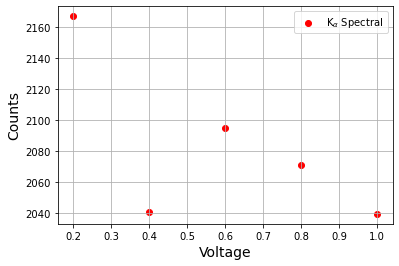

In [34]:
I_i_10 = [x/1 for x in c_ten_sec_float]
I_i_8 = [x/0.8 for x in c_mA_8_float]
I_i_6 = [x/0.6 for x in c_mA_6_float]
I_i_4 = [x/0.4 for x in c_mA_4_float]
I_i_2 = [x/0.2 for x in c_mA_2_float]

c = [1, 0.8, 0.6, 0.4, 0.2]
vals = [np.nanmax(I_i_10), np.nanmax(I_i_8), np.nanmax(I_i_6), np.nanmax(I_i_4), np.nanmax(I_i_2)]
#print(vals)
#print(c_mA_4_float)

plt.figure()
plt.scatter(c, vals, color = 'r', label = r'K$_\alpha$ Spectral')
#plt.scatter(volt, beta_s, color = 'purple', label = r'K$_\beta$ Spectral')
#plt.scatter(volt, alpha_b, color = 'green', label = r'K$_\alpha$ Background', marker = "x")
#plt.scatter(volt, beta_b, color = 'teal', label = r'K$_\beta$ Background', marker = "x")

plt.xlabel('Voltage', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.grid()
plt.legend()

#plt.savefig('spectral_background.png', bbox_inches='tight')

[ 8.2850745e-10 -1.5092413e-11]
[2.18785024e-11 4.73140620e-12]


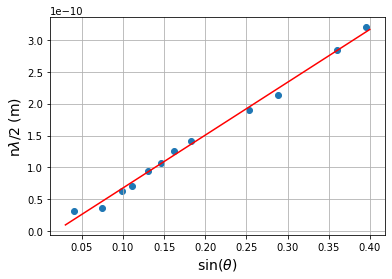

In [79]:
source3 = 'Lab 6 Part 2.csv'

file3 = open(source3)
#print(file)

csvreader3 = csv.reader(file3)
#print(csvreader)

data3 = pd.read_csv(source3)

mica = [float(x) for x in data3['Mica']]
angle = [float(x) for x in data3['Angle']]
lif = [float(x) for x in data3['LiF']]
kcl = [float(x) for x in data3['KCl']]

sin_theta = [math.sin(2.3*math.pi/180), math.sin(4.3*math.pi/180), math.sin(5.7*math.pi/180), 
             math.sin(6.4*math.pi/180), math.sin(7.5*math.pi/180), math.sin(8.4*math.pi/180),
            math.sin(9.3*math.pi/180), math.sin(10.5*math.pi/180), math.sin(14.7*math.pi/180),
            math.sin(16.8*math.pi/180), math.sin(21.1*math.pi/180), math.sin(23.3*math.pi/180)]
            
#sin_theta = [math.sin(5.6*math.pi/180), math.sin(6.3*math.pi/180), math.sin(11.4*math.pi/180), 
             #math.sin(12.9*math.pi/180), math.sin(17.3*math.pi/180), math.sin(19.6*math.pi/180)]
    
#sin_theta = [math.sin(8.7*math.pi/180), math.sin(9.8*math.pi/180), math.sin(18.0*math.pi/180), math.sin(20.3*math.pi/180)]

#sin_theta = [math.sin(6.3*math.pi/180), math.sin(7.2*math.pi/180), math.sin(12.8*math.pi/180), 
             #math.sin(14.5*math.pi/180), math.sin(19.5*math.pi/180), math.sin(22.1*math.pi/180)]

K_alpha = 0.07107e-9
K_beta = 0.06322e-9

n_lambda = [K_beta/2, K_alpha/2, 2*K_beta/2, 2*K_alpha/2, 3*K_beta/2, 3*K_alpha/2, 4*K_beta/2, 4*K_alpha/2, 
            6*K_beta/2, 6*K_alpha/2, 9*K_beta/2, 9*K_alpha/2]

plt.scatter(sin_theta, n_lambda)

def fitting_function(x, m, b):
    return m*x + b

popt, pcov = curve_fit(fitting_function, sin_theta, n_lambda, p0 = [3e-10, 0])
print(popt)
perr = np.sqrt(np.diag(pcov))
print(perr)

x = np.arange(0.03, 0.41, 0.01)
#print(fitting_function(x, *popt2))
plt.plot(x, fitting_function(x, *popt), label = 'Curve Fit', color = 'r')

plt.grid()

plt.xlabel(r'sin($\theta$)', fontsize = 14)
plt.ylabel(r'n$\lambda$/2 (m)', fontsize = 14)

plt.savefig('mica.png', bbox_inches='tight')

[ 4.87688565e+02  1.46694724e+01 -1.96290613e-01]
[ 2.07762772e+03  7.37722663e+00 -1.92553709e-01]


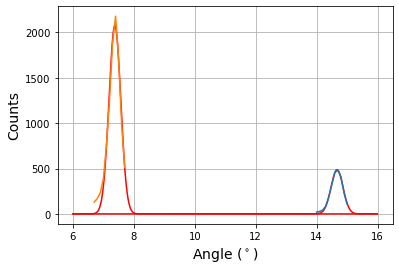

In [106]:
source3 = 'Lab6 Rocking.csv'

file3 = open(source3)
#print(file)

csvreader3 = csv.reader(file3)
#print(csvreader)

data3 = pd.read_csv(source3)

angle = [float(x) for x in data3['Angle']]
curve1 = [float(x) for x in data3['Curve 1']]
curve2 = [float(x) for x in data3['Curve 2']]

def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

popt, pcov = curve_fit(gauss_function, angle[78:-1], curve1[78:-1], p0 = [500, 15, 5])
print(popt)

popt1, pcov1 = curve_fit(gauss_function, angle[5:15], curve2[5:15], p0 = [2100, 7, 5])
print(popt1)

x = np.arange(6, 16, 0.01)
#print(fitting_function(x, *popt2))
plt.plot(x, gauss_function(x, *popt), label = 'Curve Fit', color = 'r')
plt.plot(x, gauss_function(x, *popt1), label = 'Curve Fit', color = 'r')

#print(gauss_function(x, *popt) - 243.8)

plt.plot(angle, curve1)
plt.plot(angle, curve2)
plt.grid()
plt.xlabel(r'Angle ($^\circ$)', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

plt.savefig('rocking_curves.png', bbox_inches='tight')